# Project Title
## **Yelp Restaurant Review & Price Analysis in Los Angeles**

## Introduction

This project focuses on understanding how customers feel about restaurants in Los Angeles by analyzing Yelp reviews. Yelp is an important platform where customers share dining experiences, and these comments often influence restaurant reputation and customer decisions. Instead of looking only at star ratings, this project aims to explore what customers actually talk about, what they complain about, and how price levels relate to customer opinions.

The main questions I want to answer include:

1. **What are the most frequent keywords mentioned in Yelp restaurant reviews?**

2. **What are the differences between positive and negative review keywords?**

3. **How do customer concerns vary by restaurant price level?**

4. **What are the most common keywords in reviews mentioning “service” or “staff”?**

5. **Are there mismatches between Yelp star ratings and sentiment scores?**

6. **What factors lead to strongly negative sentiment in Yelp reviews?**

This analysis is useful for restaurant owners, managers, and anyone working in the food industry. By understanding what customers consistently mention—such as slow service, high prices, or good food quality—restaurants can identify areas that need improvement. New restaurant owners or investors can also use these insights to understand what LA diners care about the most.

Overall, this project helps transform large amounts of text data into practical insights that can support better decision-making and improve customer satisfaction.


In [1]:
# Set up the environment
import time
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.common.exceptions import NoSuchElementException

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [28]:
# create Chromeoptions instance 
options = webdriver.ChromeOptions() 
 
# adding argument to disable the AutomationControlled flag 
options.add_argument("--disable-blink-features=AutomationControlled") 
 
# exclude the collection of enable-automation switches 
options.add_experimental_option("excludeSwitches", ["enable-automation"]) 
 
# turn-off userAutomationExtension 
options.add_experimental_option("useAutomationExtension", False) 
 
# setting the driver path and requesting a page 
driver = webdriver.Chrome(options=options) 

# changing the property of the navigator value for webdriver to undefined 
driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})") 

In [3]:
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [29]:

# Initialize the WebDriver and set the timeout for page loading
driver.set_page_load_timeout(60)

page_link = "https://www.yelp.com/search?find_desc=Restaurants&find_loc=Los+Angeles%2C+CA"
driver.get(page_link)

restaurant_links = []

# Loop through 10 pages (0~9, so we click Next 9 times)
for i in range(9):
    print(f"Currently on page {i + 1}")

    # Find all attraction links on the current page
    restaurants = driver.find_elements(By.XPATH, '//h3[@class="y-css-hcgwj4"]/a')
    for restaurant_url in restaurants:
        detail_link = restaurant_url.get_attribute('href')
        restaurant_links.append(detail_link)
    
    print(f"Currently collected {len(restaurant_links)} links")

    # Click the "Next page" button for the first 9 pages
    if i < 9:
        try:
            # Wait until the "Next page" button is clickable
            next_page_button = WebDriverWait(driver, 20).until(
                EC.element_to_be_clickable((By.XPATH, '(//button[@type="submit"])[4]'))
            )
            next_page_button.click()
            print("Clicking next page")
            time.sleep(10)  # Wait for the page to load after clicking
        except Exception as e:
            print(f"Error clicking 'Next page' button: {e}")
            time.sleep(5)
            break  # If there's an error clicking the button, stop the loop

# Print the total number of links collected
print(f"Total {len(restaurant_links)} restaurant links collected")


Currently on page 1
Currently collected 0 links
Clicking next page
Currently on page 2
Currently collected 13 links
Clicking next page
Currently on page 3
Currently collected 26 links
Clicking next page
Currently on page 4
Currently collected 39 links
Clicking next page
Currently on page 5
Currently collected 52 links
Clicking next page
Currently on page 6
Currently collected 65 links
Clicking next page
Currently on page 7
Currently collected 78 links
Clicking next page
Currently on page 8
Currently collected 91 links
Clicking next page
Currently on page 9
Currently collected 104 links
Clicking next page
Total 104 restaurant links collected


In [34]:
print(restaurant_links[:10])

['https://www.yelp.com/adredir?ad_business_id=rkzPMV2fpvv6cDUrgPe9ow&campaign_id=215260999&click_origin=search_results&placement=vertical_0&placement_slot=0&redirect_url=https%3A%2F%2Fwww.yelp.com%2Fbiz%2Fhokkaido-soup-curry-los-angeles&request_id=c703017824631612&signature=d69e0e4e01eddcc985e92ac1bab54705c1fb4c82d69c7407830a7e8e4c9eb010&slot=0', 'https://www.yelp.com/adredir?ad_business_id=x3k0eOHavLRd36wh6fuEpg&campaign_id=214102109&click_origin=search_results&placement=vertical_0&placement_slot=0&redirect_url=https%3A%2F%2Fwww.yelp.com%2Fbiz%2Fgreek-bistro-glendale&request_id=c703017824631612&signature=fc8ce132edc32af6c66c4d393d2d075dece40b8613c9d85e0dfa698bd07e3812&slot=1', 'https://www.yelp.com/adredir?ad_business_id=4VvUKUPntXoaOlMcIgyfNw&campaign_id=200059330&click_origin=search_results&placement=vertical_0&placement_slot=0&redirect_url=https%3A%2F%2Fwww.yelp.com%2Fbiz%2Fnavat-los-angeles-2&request_id=c703017824631612&signature=a7649f3be0cd41374f9549a629b94e69e84ec05b94918ce2aef

In [58]:
driver = webdriver.Chrome(options=options) 

In [59]:
import time
import random
from selenium.common.exceptions import NoSuchElementException

# Define storage dictionary
restaurant_dic = {
    "Restaurant_name": [],
    "Category": [],
    "Price_range": [],
    "Rating": [],
    "Review_count": [],
    "Review": [],
    "Location": [],
    "Phone_number": [],
    "Restaurant_page": []
}

# Loop to scrape restaurants in batches of 20
for i in range(0, len(restaurant_links), 15):
    batch_links = restaurant_links[i:i + 15]  # Get the next batch of 15 links

    for restaurant_link in batch_links:
        driver.get(restaurant_link)
        time.sleep(random.uniform(3, 7))  # Random delay to mimic human behavior

        try:
            name = driver.find_element("xpath", '//h1[@class="y-css-olzveb"]')
        except NoSuchElementException:
            name = None

        try:
            category = driver.find_element("xpath", '//span[@class=" y-css-1cafv3i"]')
        except NoSuchElementException:
            category = None

        try:
            price_range = driver.find_element("xpath", '//span[@class=" y-css-er802e"][2]')
        except NoSuchElementException:
            price_range = None

        try:
            rating = driver.find_element("xpath", '//div[@class="arrange__09f24__LDfbs gutter-1-5__09f24__vMtpw vertical-align-middle__09f24__zU9sE y-css-1pnalxe"]/div[2]/span[1]')
        except NoSuchElementException:
            rating = None

        try:
            review_count = driver.find_element("xpath", '//*[@id="reviews"]/section/div[2]/div[3]/div/div[1]/div/div/div[2]/div/span')
        except NoSuchElementException:
            review_count = None

        try:
            review = driver.find_element("xpath", '//div[@class=" y-css-1pnalxe"]/p/span')
        except NoSuchElementException:
            review = None

        try:
            location = driver.find_element("xpath", '(//div[@class="y-css-4cg16w"])[3]/div/div[2]/p[2]')
        except NoSuchElementException:
            location = None

        try:
            number = driver.find_element("xpath", '//div[@class="y-css-y8tdj8"]/div[2]/div/div[2]')
        except NoSuchElementException:
            number = None

        # Add data to dictionary
        restaurant_dic["Restaurant_name"].append(name.get_attribute('textContent').strip() if name else "")
        restaurant_dic["Category"].append(category.get_attribute('textContent').strip() if category else "")
        restaurant_dic["Price_range"].append(price_range.get_attribute('textContent').strip() if price_range else "")
        restaurant_dic["Rating"].append(rating.get_attribute('textContent').strip() if rating else "")
        restaurant_dic["Review_count"].append(review_count.get_attribute('textContent').strip() if review_count else "")
        restaurant_dic["Review"].append(review.get_attribute('textContent').strip() if review else "")
        restaurant_dic["Location"].append(location.get_attribute('textContent').strip() if location else "")
        restaurant_dic["Phone_number"].append(number.get_attribute('textContent').strip() if number else "")
        restaurant_dic["Restaurant_page"].append(restaurant_link)

        print(restaurant_dic["Restaurant_name"][-1], "Done!")

    print(f"Batch {i // 15 + 1} completed!")

    # Wait before starting the next batch (adjust this delay if necessary)
    if i + 15 < len(restaurant_links):
        print("Waiting 10 minutes before starting the next batch...")
        time.sleep(300)  # Wait for 10 minutes before starting the next batch of 15
    else:
        print("No more batches to process.")

print("Scraping completed successfully!")


Hokkaido Soup Curry Done!
Greek Bistro Done!
Navat Done!
Bavel Done!
HATCH Done!
Donna's Done!
Laya Restaurant Done!
Carmel Done!
Great White Done!
Settecento Done!
Holbox Done!
Running Goose Done!
Mutsu Done!
Amazon Fresh Done!
Popeyes Louisiana Kitchen Done!
Batch 1 completed!
Waiting 10 minutes before starting the next batch...
Kabuki Japanese Restaurant Done!
L'Antica Pizzeria Da Michele Done!
 Done!
Malbec Arts District Done!
Majordomo Done!
DAMA Done!
Sun Nong Dan Done!
Lemon Grove Done!
Linden Done!
Cento Pasta Bar Done!
Louders Done!
Topgolf Done!
Sushi Ran Done!
Pizza Man Done!
The Front Yard Done!
Batch 2 completed!
Waiting 10 minutes before starting the next batch...
Jilli Done!
Berenjak Done!
Osteria La Buca Done!
The Edmon Done!
Morrison Atwater Village Done!
La Bohème Done!
Perch Done!
Vala Kitchen Done!
Lasung Tofu & Pot Rice Done!
Long John Silver's Done!
Hokkaido Soup Curry Done!
Wanya Thai Catering Done!
Manuela Done!
The Hideaway Done!
Bacari W 3rd Done!
Batch 3 comp

In [60]:
#prints the key and the length of the value for each key-value pair
for key, value in restaurant_dic.items():
    print(f"{key}: {len(value)}")

Restaurant_name: 104
Category: 104
Price_range: 104
Rating: 104
Review_count: 104
Review: 104
Location: 104
Phone_number: 104
Restaurant_page: 104


In [2]:
pd.set_option('display.max_colwidth', 50)


In [70]:
# save the data in Pandas
restaurant_df = pd.DataFrame(restaurant_dic)
restaurant_df

,Restaurant_name,Category,Price_range,Rating,Review_count,Review,Location,Phone_number,Restaurant_page
0,Hokkaido Soup Curry,"Japanese, Soup",,5.0,,,,Get Directions18...,https://www.yelp...
1,Greek Bistro,"Greek, Mediterra...",$$,4.8,1286 reviews,My friends and I...,(818) 322-4343,Phone number(818...,https://www.yelp...
2,Navat,"Halal, Mediterra...",$$,4.2,59 reviews,Meat lovers unit...,1111 W Olympic B...,Phone number(323...,https://www.yelp...
3,Bavel,Middle Eastern,$$$,4.4,2886 reviews,Bavel in DTLA is...,500 Mateo St Los...,Phone number(213...,https://www.yelp...
4,HATCH,"Japanese, Tapas/...",$$,4.3,1035 reviews,We had dinner he...,700 W 7th St Ste...,Phone number(213...,https://www.yelp...
...,...,...,...,...,...,...,...,...,...
99,Bottega Louie,"Bakeries, Desser...",$$$,4.1,1125 reviews,I had been looki...,(213) 802-1470,Phone number(213...,https://www.yelp...
100,Quarter Sheets,"Pizza, Patisseri...",$$,4.5,473 reviews,Life has never b...,,Get Directions13...,https://www.yelp...
101,Broken Mouth,"Hawaiian, Korean...",$$,4.8,2311 reviews,Can't believe it...,718 S Los Angele...,Phone number(213...,https://www.yelp...
102,Danbi,Korean,$$$,4.5,304 reviews,My husband and I...,3465 W 6th St St...,Phone number(818...,https://www.yelp...


In [62]:
restaurant_df.to_excel("/Users/ianhuang/Desktop/KSU Fall 2025/670/restaurant.xlsx", index=False)

In [2]:
restaurant_df = pd.read_excel("restaurant.xlsx")

In [3]:
restaurant_df.head()

,Restaurant_name,Category,Price_range,Rating,Review_count,Review,Location,Phone_number,Restaurant_page
0,Hokkaido Soup Curry,"Japanese, Soup",NaN,5.0,NaN,NaN,NaN,Get Directions1870 W Washington Blvd Los Angel...,https://www.yelp.com/adredir?ad_business_id=rk...
1,Greek Bistro,"Greek, Mediterranean, Cocktail Bars",$$,4.8,1286 reviews,My friends and I went to Castaway on a Thursda...,(818) 322-4343,Phone number(818) 322-4343,https://www.yelp.com/adredir?ad_business_id=x3...
2,Navat,"Halal, Mediterranean, Food Trucks",$$,4.2,59 reviews,Meat lovers unite; navat is serving up the jui...,"1111 W Olympic Blvd Los Angeles, CA 90015",Phone number(323) 244-4141,https://www.yelp.com/adredir?ad_business_id=4V...
3,Bavel,Middle Eastern,$$$,4.4,2886 reviews,Bavel in DTLA is next level. From the moment y...,"500 Mateo St Los Angeles, CA 90013",Phone number(213) 232-4966,https://www.yelp.com/biz/bavel-los-angeles-3?o...
4,HATCH,"Japanese, Tapas/Small Plates, Cocktail Bars",$$,4.3,1035 reviews,We had dinner here the other night and it migh...,"700 W 7th St Ste G600 Los Angeles, CA 90017",Phone number(213) 282-9070,https://www.yelp.com/biz/hatch-los-angeles-3?o...


In [4]:
restaurant_df.isnull().sum()

Restaurant_name     2
Category            2
Price_range        30
Rating              3
Review_count        4
Review              4
Location           12
Phone_number        1
Restaurant_page     0
dtype: int64

In [5]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_name  102 non-null    object 
 1   Category         102 non-null    object 
 2   Price_range      74 non-null     object 
 3   Rating           101 non-null    float64
 4   Review_count     100 non-null    object 
 5   Review           100 non-null    object 
 6   Location         92 non-null     object 
 7   Phone_number     103 non-null    object 
 8   Restaurant_page  104 non-null    object 
dtypes: float64(1), object(8)
memory usage: 7.4+ KB


In [6]:
#Remove rows with missing values 
restaurant_df = restaurant_df.dropna(subset=['Restaurant_name', 'Category', 'Rating', 'Review_count', 'Review'])

In [7]:
# Convert the 'Price_range' column from symbols to numbers using the mapping
price_map = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
restaurant_df['Price_range_num'] = restaurant_df['Price_range'].map(price_map)

# Fill any missing values in 'Price_range_num' with the median price
median_price = restaurant_df['Price_range_num'].median()
restaurant_df['Price_range_num'] = restaurant_df['Price_range_num'].fillna(median_price)

In [8]:
restaurant_df.head()

,Restaurant_name,Category,Price_range,Rating,Review_count,Review,Location,Phone_number,Restaurant_page,Price_range_num
1,Greek Bistro,"Greek, Mediterranean, Cocktail Bars",$$,4.8,1286 reviews,My friends and I went to Castaway on a Thursda...,(818) 322-4343,Phone number(818) 322-4343,https://www.yelp.com/adredir?ad_business_id=x3...,2.0
2,Navat,"Halal, Mediterranean, Food Trucks",$$,4.2,59 reviews,Meat lovers unite; navat is serving up the jui...,"1111 W Olympic Blvd Los Angeles, CA 90015",Phone number(323) 244-4141,https://www.yelp.com/adredir?ad_business_id=4V...,2.0
3,Bavel,Middle Eastern,$$$,4.4,2886 reviews,Bavel in DTLA is next level. From the moment y...,"500 Mateo St Los Angeles, CA 90013",Phone number(213) 232-4966,https://www.yelp.com/biz/bavel-los-angeles-3?o...,3.0
4,HATCH,"Japanese, Tapas/Small Plates, Cocktail Bars",$$,4.3,1035 reviews,We had dinner here the other night and it migh...,"700 W 7th St Ste G600 Los Angeles, CA 90017",Phone number(213) 282-9070,https://www.yelp.com/biz/hatch-los-angeles-3?o...,2.0
5,Donna's,Italian,$$$,4.3,567 reviews,Food: 9/10Service: 10/10Ambiance: 9/10Donna's ...,"1538 Sunset Blvd Los Angeles, CA 90026",Phone number(213) 266-8132,https://www.yelp.com/biz/donnas-los-angeles?os...,3.0


In [9]:
restaurant_df.isnull().sum()

Restaurant_name     0
Category            0
Price_range        26
Rating              0
Review_count        0
Review              0
Location            9
Phone_number        0
Restaurant_page     0
Price_range_num     0
dtype: int64

In [10]:
# Clean 'Review_count' by removing " reviews", converting to numeric, casting to integers.
restaurant_df["Review_count"] = restaurant_df["Review_count"].str.replace(" reviews", "", regex=False)

restaurant_df["Review_count"] = pd.to_numeric(restaurant_df["Review_count"], errors='coerce')

restaurant_df.head()


,Restaurant_name,Category,Price_range,Rating,Review_count,Review,Location,Phone_number,Restaurant_page,Price_range_num
1,Greek Bistro,"Greek, Mediterranean, Cocktail Bars",$$,4.8,1286,My friends and I went to Castaway on a Thursda...,(818) 322-4343,Phone number(818) 322-4343,https://www.yelp.com/adredir?ad_business_id=x3...,2.0
2,Navat,"Halal, Mediterranean, Food Trucks",$$,4.2,59,Meat lovers unite; navat is serving up the jui...,"1111 W Olympic Blvd Los Angeles, CA 90015",Phone number(323) 244-4141,https://www.yelp.com/adredir?ad_business_id=4V...,2.0
3,Bavel,Middle Eastern,$$$,4.4,2886,Bavel in DTLA is next level. From the moment y...,"500 Mateo St Los Angeles, CA 90013",Phone number(213) 232-4966,https://www.yelp.com/biz/bavel-los-angeles-3?o...,3.0
4,HATCH,"Japanese, Tapas/Small Plates, Cocktail Bars",$$,4.3,1035,We had dinner here the other night and it migh...,"700 W 7th St Ste G600 Los Angeles, CA 90017",Phone number(213) 282-9070,https://www.yelp.com/biz/hatch-los-angeles-3?o...,2.0
5,Donna's,Italian,$$$,4.3,567,Food: 9/10Service: 10/10Ambiance: 9/10Donna's ...,"1538 Sunset Blvd Los Angeles, CA 90026",Phone number(213) 266-8132,https://www.yelp.com/biz/donnas-los-angeles?os...,3.0


In [11]:
restaurant_df["Phone_number"] = restaurant_df["Phone_number"].str.replace("Phone number", "", regex=False)
restaurant_df.head()

,Restaurant_name,Category,Price_range,Rating,Review_count,Review,Location,Phone_number,Restaurant_page,Price_range_num
1,Greek Bistro,"Greek, Mediterranean, Cocktail Bars",$$,4.8,1286,My friends and I went to Castaway on a Thursda...,(818) 322-4343,(818) 322-4343,https://www.yelp.com/adredir?ad_business_id=x3...,2.0
2,Navat,"Halal, Mediterranean, Food Trucks",$$,4.2,59,Meat lovers unite; navat is serving up the jui...,"1111 W Olympic Blvd Los Angeles, CA 90015",(323) 244-4141,https://www.yelp.com/adredir?ad_business_id=4V...,2.0
3,Bavel,Middle Eastern,$$$,4.4,2886,Bavel in DTLA is next level. From the moment y...,"500 Mateo St Los Angeles, CA 90013",(213) 232-4966,https://www.yelp.com/biz/bavel-los-angeles-3?o...,3.0
4,HATCH,"Japanese, Tapas/Small Plates, Cocktail Bars",$$,4.3,1035,We had dinner here the other night and it migh...,"700 W 7th St Ste G600 Los Angeles, CA 90017",(213) 282-9070,https://www.yelp.com/biz/hatch-los-angeles-3?o...,2.0
5,Donna's,Italian,$$$,4.3,567,Food: 9/10Service: 10/10Ambiance: 9/10Donna's ...,"1538 Sunset Blvd Los Angeles, CA 90026",(213) 266-8132,https://www.yelp.com/biz/donnas-los-angeles?os...,3.0


#### Clean the 'Review' for each product 

In [12]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer, SnowballStemmer

# define your cleaning pipeline
# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
snowball = SnowballStemmer('english')

def clean_pipeline(df, use_stemming=False): # by default we do not stemming the words
    # step 1: removing special characters, keeping words and numbers
    Review = re.sub("[^a-zA-Z0-9]", " ", df)

    # extra step: lower the cases
    Review = Review.lower()
    
    # step 2: tokenizing sentences into words
    token_list = word_tokenize(Review)
    
    # step 3: removing stopwords
    filtered_tokens = [word for word in token_list if word.lower() not in stopwords.words('english')]
    
    # step 4: lemmatizing the list without stopwords 
    lemma_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # step 5 (optional): stemming the lemmatized words
    if use_stemming:
        stem_lemma_words = [snowball.stem(word) for word in lemma_words]

        # if use stemming, show this result
        return stem_lemma_words

    # if not use stemming, show this result
    return lemma_words

    # Step 6: Filter tokens into parts of speech and lemmatize them
    nouns = [lemmatizer.lemmatize(word, pos=word_pos(tag)) for word, tag in word_tag if "NN" in tag]
    
        
    # Return the processed lists when use_stemming is False
    return nouns

In [13]:
restaurant_df["Cleaned"] = restaurant_df['Review'].apply(clean_pipeline).apply(lambda x: ' '.join(x))
restaurant_df.head()

,Restaurant_name,Category,Price_range,Rating,Review_count,Review,Location,Phone_number,Restaurant_page,Price_range_num,Cleaned
1,Greek Bistro,"Greek, Mediterranean, Cocktail Bars",$$,4.8,1286,My friends and I went to Castaway on a Thursda...,(818) 322-4343,(818) 322-4343,https://www.yelp.com/adredir?ad_business_id=x3...,2.0,friend went castaway thursday greek bistro fri...
2,Navat,"Halal, Mediterranean, Food Trucks",$$,4.2,59,Meat lovers unite; navat is serving up the jui...,"1111 W Olympic Blvd Los Angeles, CA 90015",(323) 244-4141,https://www.yelp.com/adredir?ad_business_id=4V...,2.0,meat lover unite navat serving juiciest meat p...
3,Bavel,Middle Eastern,$$$,4.4,2886,Bavel in DTLA is next level. From the moment y...,"500 Mateo St Los Angeles, CA 90013",(213) 232-4966,https://www.yelp.com/biz/bavel-los-angeles-3?o...,3.0,bavel dtla next level moment walk vibe electri...
4,HATCH,"Japanese, Tapas/Small Plates, Cocktail Bars",$$,4.3,1035,We had dinner here the other night and it migh...,"700 W 7th St Ste G600 Los Angeles, CA 90017",(213) 282-9070,https://www.yelp.com/biz/hatch-los-angeles-3?o...,2.0,dinner night might favorite meal 2025 plenty p...
5,Donna's,Italian,$$$,4.3,567,Food: 9/10Service: 10/10Ambiance: 9/10Donna's ...,"1538 Sunset Blvd Los Angeles, CA 90026",(213) 266-8132,https://www.yelp.com/biz/donnas-los-angeles?os...,3.0,food 9 10service 10 10ambiance 9 10donna absol...


## Data Analysis

The following six questions guide the analysis process and connect the textual and numerical dimensions of the Yelp dataset:

1. **What are the most frequent keywords mentioned in Yelp restaurant reviews?**

2. **What are the differences between positive and negative review keywords?**

3. **How do customer concerns vary by restaurant price level?**

4. **What are the most common keywords in reviews mentioning “service” or “staff”?**

5. **Are there mismatches between Yelp star ratings and sentiment scores?**

6. **What factors lead to strongly negative sentiment in Yelp reviews?**


### 1. **What are the most frequent keywords mentioned in Yelp restaurant reviews?**  
   The most frequent words include “service”, “food”, “flavor”, and “time”, indicating that customer reviews primarily focus on service quality and food experience.

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image # Pillow library (PIL)
import requests
from io import BytesIO
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer

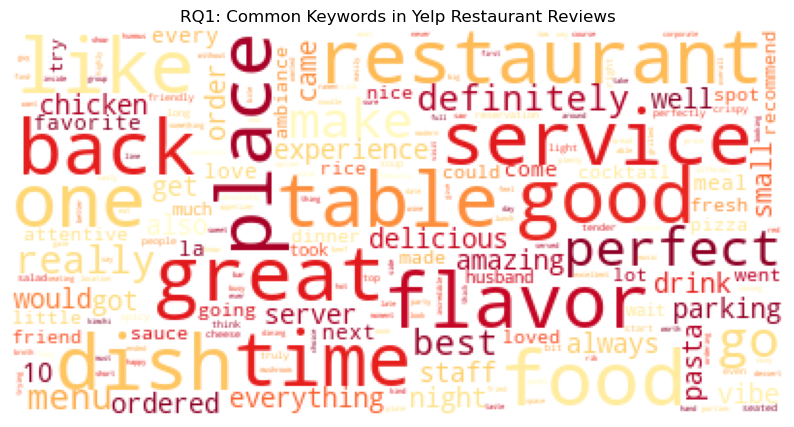

In [34]:
# Cleaned review column: "Cleaned"
all_text = " ".join(restaurant_df["Cleaned"])

# TF-IDF Unigram
tfidfVectorizer_uni = TfidfVectorizer(ngram_range=(1, 1))
tfidf_matrix_uni = tfidfVectorizer_uni.fit_transform([all_text])

# Convert TF-IDF to DataFrame
tfidf_df_uni = pd.DataFrame(
    tfidf_matrix_uni.toarray().T,
    index=tfidfVectorizer_uni.get_feature_names_out(),
    columns=["TF-IDF"]
).sort_values("TF-IDF", ascending=False)

# Generate WordCloud

freq_dict = dict(zip(tfidf_df_uni.index, tfidf_df_uni["TF-IDF"]))

wordcloud = WordCloud(max_font_size=40, 
                      relative_scaling=.1, 
                      background_color='white',
                      colormap='YlOrRd')
wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("RQ1: Common Keywords in Yelp Restaurant Reviews")
plt.show()


### 2. **What are the differences between positive and negative review keywords?**  

##### Sentiment Analysis

- **Positive reviews** highlight good experiences, such as great food, service, and ambiance.
- **Negative reviews** focus on dissatisfaction with food or service.

##### Descriptive vs. Product/Brand Focus

- **Positive reviews** use more descriptive words related to the dining experience (e.g., *delicious*, *experience*).
- **Negative reviews** often mention specific food items or service issues (e.g., *chicken*, *sandwich*, *service*).


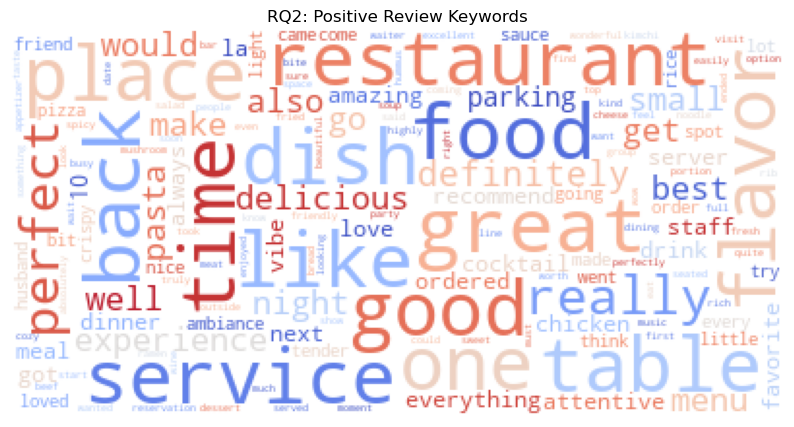

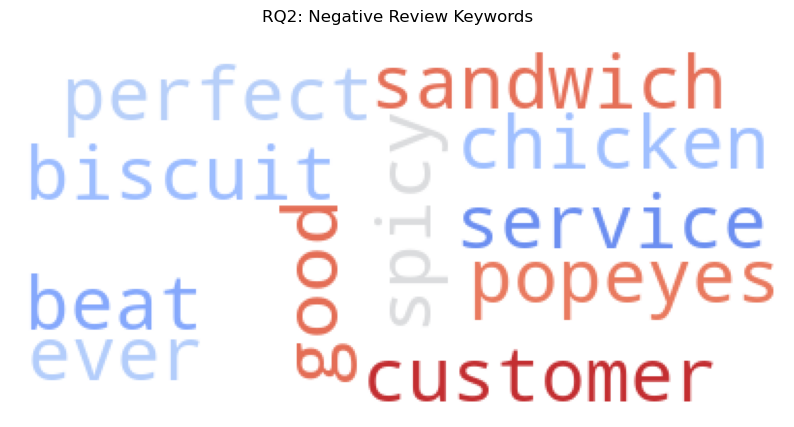

In [35]:
# Define positive and negative groups
pos_reviews = restaurant_df[restaurant_df["Rating"] >= 4]["Cleaned"]
neg_reviews = restaurant_df[restaurant_df["Rating"] <= 2]["Cleaned"]

# Combine into long text
pos_text = " ".join(pos_reviews)
neg_text = " ".join(neg_reviews)

# TF-IDF + WordCloud function
def plot_wordcloud(text, title):
    tfidfVectorizer_uni = TfidfVectorizer(ngram_range=(1, 1))
    tfidf_matrix_uni = tfidfVectorizer_uni.fit_transform([text])

    tfidf_df_uni = pd.DataFrame(
        tfidf_matrix_uni.toarray().T,
        index=tfidfVectorizer_uni.get_feature_names_out(),
        columns=["TF-IDF"]
    ).sort_values("TF-IDF", ascending=False)

    freq_dict = dict(zip(tfidf_df_uni.index, tfidf_df_uni["TF-IDF"]))

    wordcloud = WordCloud(max_font_size=40,
                          relative_scaling=.1,
                          background_color='white',
                          colormap='coolwarm')
    wordcloud.generate_from_frequencies(freq_dict)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot
plot_wordcloud(pos_text, "RQ2: Positive Review Keywords")
plot_wordcloud(neg_text, "RQ2: Negative Review Keywords")


### 3. **How do customer concerns vary by restaurant price level?**  


**Low-price restaurants (Price Level 1.0)**:
   - Customers care about affordable food and quick service.
   - Focus on casual dining, specific food items like chicken and pizza.

**Mid-price restaurants (Price Level 2.0)**:
   - Customers look for a balance between food quality and service.
   - Concerns include location, ambiance, and a pleasant dining experience.

**Higher-price restaurants (Price Level 3.0)**:
   - Customers expect a premium dining experience with exceptional service.
   - Special occasions and memorable moments are key factors.

**High-end restaurants (Price Level 4.0)**:
   - Focus on gourmet dishes, multi-course meals, and personalized service.
   - Customers expect a luxurious ambiance and attention to detail.



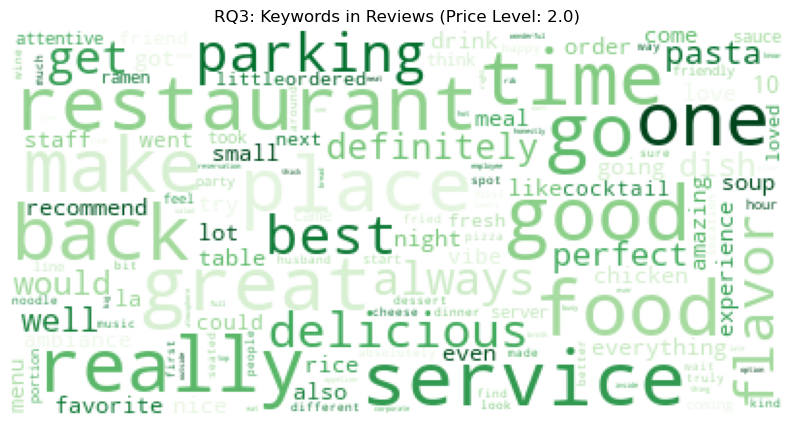

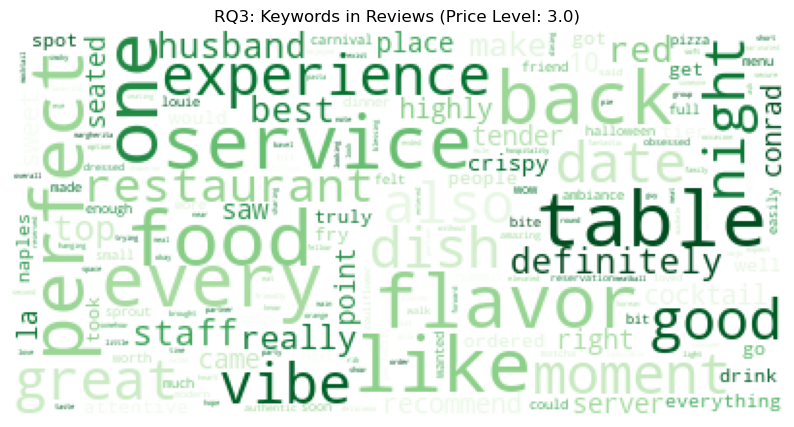

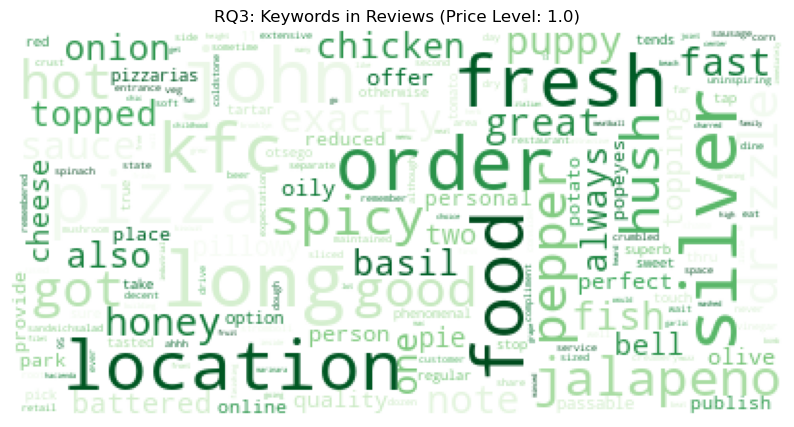

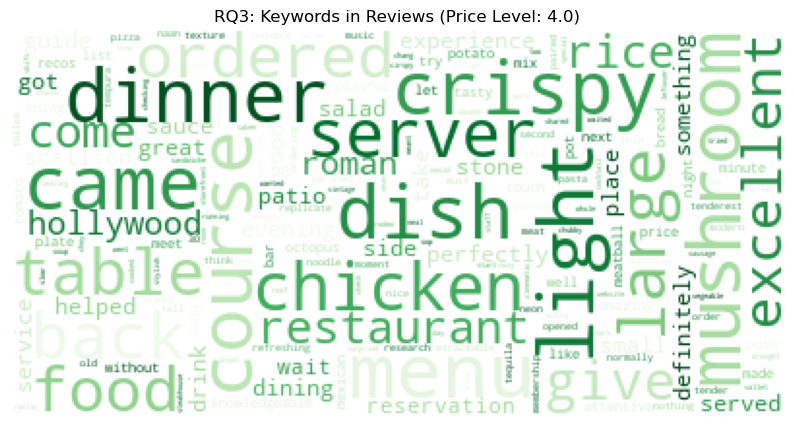

In [38]:
price_levels = restaurant_df["Price_range_num"].unique()

for p in price_levels:
    subset = restaurant_df[restaurant_df["Price_range_num"] == p]["Cleaned"]
    combined_text = " ".join(subset)
    
    tfidfVectorizer_uni = TfidfVectorizer(ngram_range=(1, 1))
    tfidf_matrix_uni = tfidfVectorizer_uni.fit_transform([combined_text])
    
    tfidf_df_uni = pd.DataFrame(
        tfidf_matrix_uni.toarray().T,
        index=tfidfVectorizer_uni.get_feature_names_out(),
        columns=["TF-IDF"]
    ).sort_values("TF-IDF", ascending=False)
    
    freq_dict = dict(zip(tfidf_df_uni.index, tfidf_df_uni["TF-IDF"]))
    
    wordcloud = WordCloud(max_font_size=40, 
                          relative_scaling=.1, 
                          background_color='white',
                          colormap='Greens')
    wordcloud.generate_from_frequencies(freq_dict)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f"RQ3: Keywords in Reviews (Price Level: {p})")
    plt.show()


### 4. **What are the most common keywords in reviews mentioning “service” or “staff”?**  

The most common keywords in reviews mentioning "service" or "staff" are:
- **service**
- **great**
- **food**

Customers frequently highlight the quality of the **service**, the overall **restaurant experience**, and the **food** in their reviews.

Other common mentions include:
- **time**
- **flavor**

These reflect the importance of **service speed** and food quality.


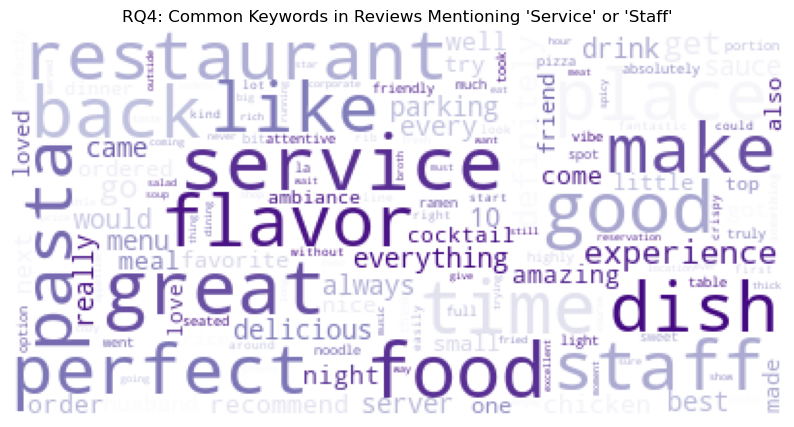

In [45]:
# Filter reviews that contain the keywords 'service' or 'staff'
service_reviews = restaurant_df[restaurant_df["Cleaned"].str.contains("service|staff", case=False, na=False)]["Cleaned"]

# Combine the filtered reviews into one large text
combined_text = " ".join(service_reviews)

# Create a TF-IDF vectorizer with unigram (1-gram) range
tfidfVectorizer_uni = TfidfVectorizer(ngram_range=(1, 1))

# Apply the TF-IDF vectorizer to the combined text to create the TF-IDF matrix
tfidf_matrix_uni = tfidfVectorizer_uni.fit_transform([combined_text])

# Convert the TF-IDF matrix to a DataFrame, sorted by TF-IDF values in descending order
tfidf_df_uni = pd.DataFrame(
    tfidf_matrix_uni.toarray().T,  # Transpose the matrix to get terms as rows
    index=tfidfVectorizer_uni.get_feature_names_out(),  # Use the feature names (terms) as index
    columns=["TF-IDF"]
).sort_values("TF-IDF", ascending=False)  # Sort by TF-IDF score in descending order

# Create a dictionary of terms and their corresponding TF-IDF values
freq_dict = dict(zip(tfidf_df_uni.index, tfidf_df_uni["TF-IDF"]))

# Generate a word cloud using the TF-IDF values
wordcloud = WordCloud(max_font_size=40, 
                      relative_scaling=.1, 
                      background_color='white',
                      colormap='Purples')
wordcloud.generate_from_frequencies(freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')  # Remove axes
plt.title("RQ4: Common Keywords in Reviews Mentioning 'Service' or 'Staff'")  # Title for the word cloud
plt.show()


### 5. **Are there mismatches between Yelp star ratings and sentiment scores?**  

Yes, there are mismatches between Yelp star ratings and sentiment scores. 

Some reviews with **positive sentiment** (Polarity > 0.1) have **low ratings** (<= 3 stars), suggesting a friendly tone but dissatisfaction in other areas. 

Conversely, some reviews with **negative sentiment** (Polarity < 0.1) have **high ratings** (>= 4 stars), indicating that users gave high ratings despite complaints or negative feelings. 

This shows that sentiment and ratings don't always align perfectly, and other factors might influence the overall rating.


In [20]:
restaurant_df.head()

,Restaurant_name,Category,Price_range,Rating,Review_count,Review,Location,Phone_number,Restaurant_page,Price_range_num,Cleaned,Polarity,Subjectivity
1,Greek Bistro,"Greek, Mediterranean, Cocktail Bars",$$,4.8,1286.0,My friends and I went to Castaway on a Thursda...,(818) 322-4343,(818) 322-4343,https://www.yelp.com/adredir?ad_business_id=x3...,2.0,friend went castaway thursday greek bistro fri...,0.070000,0.265000
2,Navat,"Halal, Mediterranean, Food Trucks",$$,4.2,59.0,Meat lovers unite; navat is serving up the jui...,"1111 W Olympic Blvd Los Angeles, CA 90015",(323) 244-4141,https://www.yelp.com/adredir?ad_business_id=4V...,2.0,meat lover unite navat serving juiciest meat p...,0.357970,0.560913
3,Bavel,Middle Eastern,$$$,4.4,2886.0,Bavel in DTLA is next level. From the moment y...,"500 Mateo St Los Angeles, CA 90013",(213) 232-4966,https://www.yelp.com/biz/bavel-los-angeles-3?o...,3.0,bavel dtla next level moment walk vibe electri...,0.380476,0.685714
4,HATCH,"Japanese, Tapas/Small Plates, Cocktail Bars",$$,4.3,1035.0,We had dinner here the other night and it migh...,"700 W 7th St Ste G600 Los Angeles, CA 90017",(213) 282-9070,https://www.yelp.com/biz/hatch-los-angeles-3?o...,2.0,dinner night might favorite meal 2025 plenty p...,0.273016,0.561706
5,Donna's,Italian,$$$,4.3,567.0,Food: 9/10Service: 10/10Ambiance: 9/10Donna's ...,"1538 Sunset Blvd Los Angeles, CA 90026",(213) 266-8132,https://www.yelp.com/biz/donnas-los-angeles?os...,3.0,food 9 10service 10 10ambiance 9 10donna absol...,0.362698,0.585714


In [21]:
from textblob import TextBlob
# Create sentiment columns
restaurant_df['Cleaned'] = restaurant_df['Cleaned'].fillna("").astype(str)

for index, cleaned_review in enumerate(restaurant_df['Cleaned']):
    polarity, subjectivity = TextBlob(cleaned_review).sentiment
    restaurant_df.loc[index, 'Polarity'] = polarity
    restaurant_df.loc[index, 'Subjectivity'] = subjectivity


In [22]:
# Low rating but positive sentiment (dissatisfied but friendly tone)
positive_low = restaurant_df[(restaurant_df["Polarity"] > 0.1) & (restaurant_df["Rating"] <= 3)]
positive_low[["Review", "Rating", "Polarity", "Subjectivity"]]

,Review,Rating,Polarity,Subjectivity
14,The biscuit was perfect and good customer serv...,1.9,0.333958,0.726458
52,I had the best late night snack at Fat Sal's V...,2.9,0.500000,0.562500
65,The food was amazing! Service was outstanding!...,2.5,0.450000,0.456250
91,Do I like the French Ciabatta Dipper? With fin...,2.8,0.434307,0.649459
92,Not sure why with the dozens of pizzarias in t...,2.2,0.387037,0.535185


In [24]:
# High rating but negative sentiment (satisfied but with many complaints)
negative_high = restaurant_df[(restaurant_df["Polarity"] < 0.1) & (restaurant_df["Rating"] >= 4)]
negative_high[["Review", "Rating", "Polarity", "Subjectivity"]]

,Review,Rating,Polarity,Subjectivity
1,My friends and I went to Castaway on a Thursda...,4.8,0.070000,0.265000
21,Always a solid place to stop at when looking f...,4.5,0.000000,0.000000
37,Excellent food. Very courteous and friendly se...,4.8,0.085882,0.461176
38,Great service and delicious food! The ambiance...,4.4,0.060000,0.750000
57,It was really good and I loved it. Wishing to ...,4.6,0.083333,0.541667
60,This place has the best chicken sandwiches I'v...,4.7,0.065556,0.578889
69,Great service. My husband uses a walker and t...,4.2,0.000000,0.000000
83,Our server was Aldrick. We came in Friday at 6...,4.3,-0.060000,0.450000
100,Life has never been the same after trying this...,4.5,0.000000,0.000000
101,Can't believe it took me so long to finally tr...,4.8,0.000000,0.000000


### 6. **What factors lead to strongly negative sentiment in Yelp reviews?**

Based on the TF-IDF results, some factors that seem to contribute to strongly negative sentiment in Yelp reviews include:

1. **Poor Service**: Words like **"staff"**, **"service"**, and **"staff"** appear frequently, suggesting dissatisfaction with customer service.
2. **Unmet Expectations**: Words like **"perfect"**, **"delicious"**, and **"try"** imply a gap between expectations and experience, where the food or experience didn’t live up to the hype.
3. **Food Quality**: Terms like **"dish"**, **"food"**, **"chicken"**, and **"pizza"** suggest that food quality or taste may be a common source of frustration.
4. **Overall Experience**: **"time"**, **"line"**, **"place"**, and **"going"** suggest that waiting or issues with the location could affect the reviewer's experience negatively.

These words reflect common themes in negative reviews, such as poor service, food quality issues, or frustrating experiences with the restaurant environment.


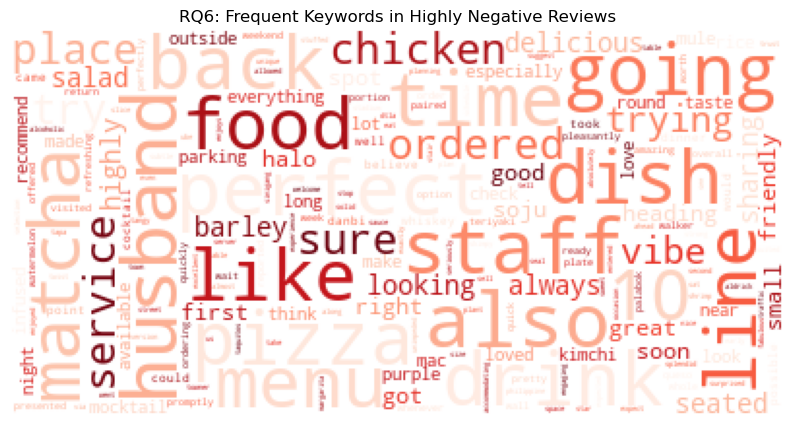

In [33]:
negative_reviews = restaurant_df[restaurant_df["Polarity"] < 0.01]["Cleaned"]

combined_neg_text = " ".join(negative_reviews)

tfidfVectorizer_uni = TfidfVectorizer(ngram_range=(1, 1))
tfidf_matrix_uni = tfidfVectorizer_uni.fit_transform([combined_neg_text])

tfidf_df_uni = pd.DataFrame(
    tfidf_matrix_uni.toarray().T,
    index=tfidfVectorizer_uni.get_feature_names_out(),
    columns=["TF-IDF"]
).sort_values("TF-IDF", ascending=False)

freq_dict = dict(zip(tfidf_df_uni.index, tfidf_df_uni["TF-IDF"]))

wordcloud = WordCloud(max_font_size=40,
                      relative_scaling=.1,
                      background_color='white',
                      colormap='Reds')
wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("RQ6: Frequent Keywords in Highly Negative Reviews")
plt.show()


# Executive Summary

Our analysis of Yelp restaurant reviews in Los Angeles reveals three key insights about what drives customer satisfaction:

1. **Food Quality**: Food quality remains the strongest positive factor, but concerns about **price fairness** frequently appear in customer feedback.
2. **Operational Issues**: Issues such as **long wait times**, **slow service**, and **inconsistent staff attitude** are the most common sources of dissatisfaction and often outweigh food-related opinions.
3. **Sentiment-Rating Mismatches**: Sentiment–rating mismatches show that **star ratings alone** are insufficient; many customers rate based on the **overall experience** rather than the food itself.

Overall, the findings suggest that LA restaurants can significantly improve customer satisfaction by optimizing **service quality** and managing **value perception**, not just focusing on food. These insights provide actionable guidance for restaurant managers seeking to enhance **loyalty** and strengthen their **competitive position**.
